Встановлюємо необхідні бібліотеки

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

Завантажуємо дані з файлу

In [38]:
data = pd.read_csv('Road_Weather_Information_Stations_20240401.csv')

Переглядаємо 10 перших записів

In [39]:
data.head(10)


,StationName,StationLocation,DateTime,RecordId,RoadSurfaceTemperature,AirTemperature
0,SpokaneSwingBridge,POINT (-122.351743 47.571389),09/18/2019 02:02:00 AM,3500793,57.45,61.86
1,NE45StViaduct,POINT (-122.301929 47.66127),09/18/2019 03:12:00 PM,3594561,78.25,68.40
2,AlbroPlaceAirportWay,POINT (-122.314114 47.547426),09/17/2019 02:17:00 AM,451479,18.76,27.24
3,AlbroPlaceAirportWay,POINT (-122.314114 47.547426),09/17/2019 02:18:00 AM,451480,18.77,27.28
4,AlbroPlaceAirportWay,POINT (-122.314114 47.547426),09/17/2019 02:19:00 AM,451481,18.78,27.30
5,AlbroPlaceAirportWay,POINT (-122.314114 47.547426),09/17/2019 02:20:00 AM,451482,18.80,27.29
6,HarborAveUpperNorthBridge,POINT (-122.370873 47.571695),09/17/2019 02:16:00 AM,2546638,60.22,57.73
7,HarborAveUpperNorthBridge,POINT (-122.370873 47.571695),09/17/2019 02:17:00 AM,2546639,60.20,57.75
8,HarborAveUpperNorthBridge,POINT (-122.370873 47.571695),09/17/2019 02:18:00 AM,2546640,60.19,57.79
9,HarborAveUpperNorthBridge,POINT (-122.370873 47.571695),09/17/2019 02:19:00 AM,2546641,60.17,57.81


Переглядаємо 5 останніх записів

In [40]:
data.tail(5)

,StationName,StationLocation,DateTime,RecordId,RoadSurfaceTemperature,AirTemperature
1249995,RooseveltWay_NE80thSt,POINT (-122.31765 47.692098),08/26/2020 04:11:00 PM,4082547,82.4,82.4
1249996,RooseveltWay_NE80thSt,POINT (-122.31765 47.692098),08/26/2020 04:12:00 PM,4082548,82.3,82.3
1249997,RooseveltWay_NE80thSt,POINT (-122.31765 47.692098),08/26/2020 04:13:00 PM,4082549,82.2,82.2
1249998,RooseveltWay_NE80thSt,POINT (-122.31765 47.692098),08/26/2020 04:14:00 PM,4082550,82.2,82.2
1249999,RooseveltWay_NE80thSt,POINT (-122.31765 47.692098),08/26/2020 04:15:00 PM,4082551,82.1,82.1


Визначаємо кількість записів в даних

In [41]:
data.count()

StationName               1250000
StationLocation           1250000
DateTime                  1250000
RecordId                  1250000
RoadSurfaceTemperature    1250000
AirTemperature            1250000
dtype: int64

Визначити дискриптивні статистики для температури повітря

In [42]:
data['AirTemperature'].describe()

count    1.250000e+06
mean     5.992536e+01
std      1.966873e+01
min     -4.740000e+00
25%      5.664000e+01
50%      6.383000e+01
75%      7.150000e+01
max      1.190000e+02
Name: AirTemperature, dtype: float64

In [43]:
at_count = data['AirTemperature'].count()
at_mean = data['AirTemperature'].mean()
at_median = data['AirTemperature'].median()
at_std = data['AirTemperature'].std()
at_range = data['AirTemperature'].max() - data['AirTemperature'].min()

print(f'Кількість даних рівна {at_count}')
print(f'Математичне сподівання розподілу рівне {at_mean:.2f}')
print(f'Медіана розподілу рівна {at_median:.2f}')
print(f'Середньоквадратичне відхилення розподілу рівне {at_std:.2f}')
print(f'Розмах ряду температур рівний {at_range:.2f}')

Кількість даних рівна 1250000
Математичне сподівання розподілу рівне 59.93
Медіана розподілу рівна 63.83
Середньоквадратичне відхилення розподілу рівне 19.67
Розмах ряду температур рівний 123.74


Фільтруємо дані які не входять до інтервалу [m-σ;m+σ]

In [44]:
filtered_at_data = data['AirTemperature'][(at_mean - at_std <= data['AirTemperature']) & (data['AirTemperature'] <= at_mean + at_std)]
filtered_at_data.describe()

count    955415.000000
mean         65.275025
std           7.074805
min          48.400000
25%          59.650000
50%          64.860000
75%          70.840000
max          79.590000
Name: AirTemperature, dtype: float64

Додаємо нову серію даних, в якій температуру повітря переводимо в градуси цельсія, округливши до цілого значення

In [45]:
data['AirTemperatureCelsius'] = (data['AirTemperature'] - 32) / 1.8
data['AirTemperatureCelsius'] = data['AirTemperatureCelsius'].round().astype(int)

print(data['AirTemperatureCelsius'].head(5))

0    17
1    20
2    -3
3    -3
4    -3
Name: AirTemperatureCelsius, dtype: int32


Підраховуємо кількості кожного із значень градусів

In [46]:
print(data['AirTemperatureCelsius'].groupby(data['AirTemperatureCelsius']).count())

AirTemperatureCelsius
-20     322
-19     258
-18     451
-17     422
-16     660
       ... 
 44    1212
 45     579
 46     482
 47     195
 48      81
Name: AirTemperatureCelsius, Length: 62, dtype: int64


Будуємо діаграму частот варіаційного ряду

Text(0, 0.5, 'Частота')

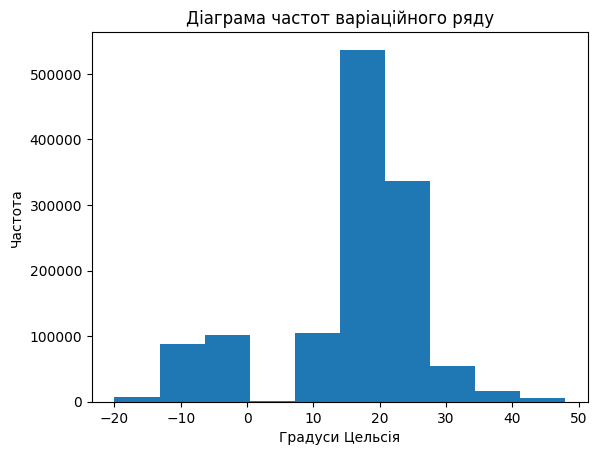

In [47]:
plt.hist(data['AirTemperatureCelsius'])
plt.title('Діаграма частот варіаційного ряду')
plt.xlabel('Градуси Цельсія')
plt.ylabel('Частота')

Виділяємо дані зібрані на станції HarborAveUpperNorthBridge

In [48]:
data[data['StationName'] == 'HarborAveUpperNorthBridge']

,StationName,StationLocation,DateTime,RecordId,RoadSurfaceTemperature,AirTemperature,AirTemperatureCelsius
6,HarborAveUpperNorthBridge,POINT (-122.370873 47.571695),09/17/2019 02:16:00 AM,2546638,60.22,57.73,14
7,HarborAveUpperNorthBridge,POINT (-122.370873 47.571695),09/17/2019 02:17:00 AM,2546639,60.20,57.75,14
8,HarborAveUpperNorthBridge,POINT (-122.370873 47.571695),09/17/2019 02:18:00 AM,2546640,60.19,57.79,14
9,HarborAveUpperNorthBridge,POINT (-122.370873 47.571695),09/17/2019 02:19:00 AM,2546641,60.17,57.81,14
10,HarborAveUpperNorthBridge,POINT (-122.370873 47.571695),09/17/2019 02:20:00 AM,2546642,60.16,57.79,14
...,...,...,...,...,...,...,...
318726,HarborAveUpperNorthBridge,POINT (-122.370873 47.571695),06/13/2020 08:09:00 AM,2930854,57.43,54.34,12
318728,HarborAveUpperNorthBridge,POINT (-122.370873 47.571695),06/13/2020 08:12:00 AM,2930855,57.50,54.54,13
318731,HarborAveUpperNorthBridge,POINT (-122.370873 47.571695),06/13/2020 08:13:00 AM,2930856,57.53,54.70,13
318734,HarborAveUpperNorthBridge,POINT (-122.370873 47.571695),06/13/2020 08:14:00 AM,2930857,57.55,54.81,13


Підраховуємо кількість даних зібраних на кожній із станцій

In [49]:
data['StationName'].value_counts()

StationName
RooseveltWay_NE80thSt        202398
35thAveSW_SWMyrtleSt         202312
NE45StViaduct                200549
AlbroPlaceAirportWay         196703
MagnoliaBridge               195158
AuroraBridge                 193781
HarborAveUpperNorthBridge     40727
SpokaneSwingBridge            18372
Name: count, dtype: int64

Будуємо scatterplot графік для дослідження зв'язку між температурою поверхні та температурою повітря

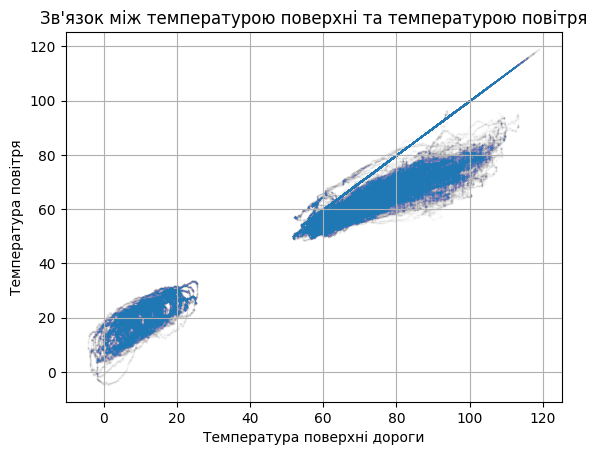

In [50]:
plt.scatter(data['RoadSurfaceTemperature'], data['AirTemperature'], s=1, alpha=0.005)
plt.title("Зв'язок між температурою поверхні та температурою повітря")
plt.xlabel('Температура поверхні дороги')
plt.ylabel('Температура повітря')
plt.grid(True)
plt.show()

Розраховуємо коефіцієнт кореляції між температурою поверхні та температурою повітря. Бачимо, що між температурами існує сильна лінійна залежність

In [51]:
corr = data['RoadSurfaceTemperature'].corr(data['AirTemperature'])

print(corr)

0.9523645165299333


Будуємо heatmap використовуючи seaborn

<Axes: >

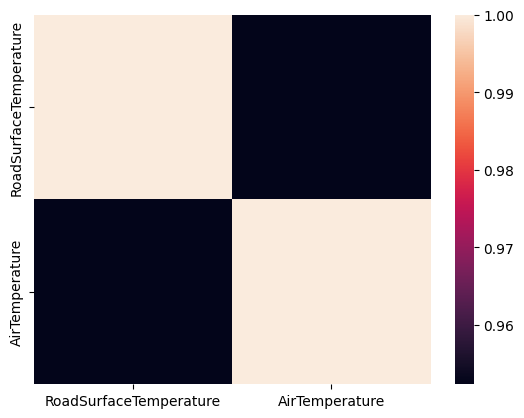

In [52]:
sns.heatmap(data[['RoadSurfaceTemperature', 'AirTemperature']].corr())

Виділяємо із StationLocation довготу та широту станцій в 2 окремі стовпці

In [53]:
locationPattern = r'POINT \((.+) (.+)\)'

coordinates = data.drop_duplicates(subset='StationLocation')['StationLocation'].str.extract(locationPattern)
coordinates.columns = ['Lng', 'Lat']
coordinates['Lng'] = coordinates['Lng'].astype(float)
coordinates['Lat'] = coordinates['Lat'].astype(float)

print(coordinates)

coordinates.to_csv('coordinates.csv', index=False)


            Lng        Lat
0   -122.351743  47.571389
1   -122.301929  47.661270
2   -122.314114  47.547426
6   -122.370873  47.571695
21  -122.317650  47.692098
51  -122.376580  47.539180
81  -122.387341  47.633454
102 -122.347278  47.643174


Відображаємо станції на карті, використовуючи сервіс Kepler

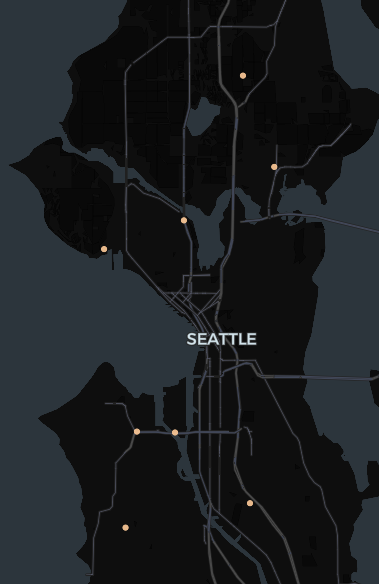